<!-- # <h1 align = "center"> Révision </h1>

<h4 align = "center"> Dans ce fichier, nous allons effectuer une analyse complète des données.</h2> -->

#  Identification du problème

La première étape de toute analyse consiste à identifier le problème que nous allons étudier. Dans ce fichier, notre problème est de déterminer quels sont les facteurs qui influencent la satisfaction des individus. Pour aborder ce problème, nous formulons plusieurs hypothèses. Par exemple, nous pourrions supposer que le revenu, l'éducation, l'expérience professionnelle et le secteur d'activité ont une influence sur la satisfaction. Pour répondre à ces questions, nous allons effectuer les analyses suivantes :

- Régression linéaire simple : nous allons essayer de prédire la satisfaction en nous basant sur une variable qui présente une relation linéaire avec la satisfaction.
- Régression linéaire multiple : nous allons essayer de prédire la satisfaction en nous basant sur plusieurs variables qui présentent une relation linéaire avec la satisfaction.
- ANOVA (Analyse de la variance) : nous allons utiliser l'ANOVA pour déterminer si les moyennes de satisfaction diffèrent significativement entre différents groupes ou catégories de variables.
- ACP (Analyse en composantes principales) : nous allons utiliser l'ACP pour réduire la dimensionnalité de nos données et identifier les variables qui contribuent le plus à la variation de la satisfaction.
- AFC (Analyse factorielle des correspondances) : nous allons utiliser l'AFC pour étudier la correspondance entre deux variables qualitatives.

# Collection des données

La deuxième étape est généralement la phase de collection des données. Pour cela, nous devons suivre plusieurs étapes :

1. Identification de l'échantillon : Il est essentiel de choisir un échantillon représentatif qui correspond à notre problème d'étude. Cela garantit que les résultats obtenus sont généralisables à la population cible.

2. Collecte des données : La collecte des données peut être réalisée à l'aide de questionnaires, d'entretiens, d'observations, etc. Il est important de collecter un maximum de données pertinentes pour notre analyse.

Dans notre cas, nous utiliserons des données générées par l'IA, juste pour la simplicité.

# Prétraitement des données

La troisième étape consiste au prétraitement des données. Cela implique la suppression des variables perturbantes, le filtrage et la suppression des colonnes indésirables, ainsi que la transformation des données en un format avec lequel nous pouvons travailler.

Pour effectuer le prétraitement des données, nous pouvons utiliser des techniques telles que :

- Nettoyage des données : Suppression des valeurs manquantes, des valeurs aberrantes et des doublons.
- Transformation des données : Normalisation, discrétisation, codage des variables catégorielles, etc.
- Sélection des variables : Identification des variables les plus pertinentes pour notre analyse.

Une fois que nous avons prétraité nos données, nous sommes prêts à passer à l'étape suivante de notre analyse.

Maintenant, on commence notre analyse, d'abord on faire la lecture des données.

- ## Lecture des données

In [117]:
data <- read.csv("data/data.csv", stringsAsFactors = TRUE)
head(data[c(0:length(data))])

,Revenu,Experience,Education,Satisfaction,Secteur,Age
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,48000,5,Secondaire,8.5,Ouvrier agricole,32
2,60000,8,Bachelor,7.2,Secrétaire,45
3,35000,3,Secondaire,6.0,Ouvrier agricole,28
4,90000,9,Ph.D.,9.3,PDG,38
5,110000,11,Master,8.8,Ingénieur agronome,50
6,75000,6,Master,7.5,Employé administratif,34


La description des données :
1. **Revenu :** Le revenu en dollars.
2. **Expérience :** Le nombre d'années d'expérience dans le domaine de travail.
3. **Éducation :** Le niveau d'éducation, catégorisé en Secondaire, Bachelor (Licence), Master et Ph.D.
4. **Satisfaction :** Le niveau de satisfaction, mesuré sur une échelle donnée.
5. **Secteur d'activité :** Le secteur d'activité dans lequel la personne travaille.
6. **Âge :** L'âge de la personne.

Dans notre cas, nous avons aucune valeur nulle.

# Analyse Statistique

Maintenant on commence notre Analyse Statistique, et la première chose est de déterminer les types des variables a étudier.

## Types des variables

### **Variables quantitatives :**

  1. Revenu - Quantitative continue (mesurée en dollars).
  2. Expérience - Quantitative discrète (mesurée en années).
  3. Satisfaction - Quantitative continue (mesurée sur une échelle).
  
### **Variables qualitatives :**

  1.  Éducation - Qualitative ordinale (niveau d'éducation catégorisé en Secondaire, Bachelor, Master, Ph.D.).
  2. Secteur - Qualitative nominale (catégorie du secteur d'activité).
  3. Âge - Qualitative ordinale (groupe d'âge).

## Analyse univariée

L'analyse univariée est une étape initiale dans l'exploration des données qui vise à comprendre la distribution et les caractéristiques d'une seule variable à la fois. Elle permet d'obtenir des informations statistiques et des tendances centrales pour une variable donnée, qu'elle soit quantitative ou qualitative.

**Pour les variables quantitatives :**
- **Description générale :** La description d'une variable quantitative implique l'analyse de la tendance centrale, qui est souvent représentée par la moyenne, la médiane et le mode. On examine également la dispersion des données, généralement mesurée par l'écart type.
- **Visualisation :** Pour visualiser une variable quantitative, on utilise généralement des histogrammes, des boîtes à moustaches (box plots) et des diagrammes de densité.

**Pour les variables qualitatives :**
- **Description générale :** Pour les variables qualitatives, l'analyse se concentre sur la fréquence de chaque catégorie. On examine également les proportions et les pourcentages pour avoir une idée de la répartition des catégories.
- **Visualisation :** Les diagrammes en barres (bar plots) et les diagrammes circulaires (pie charts) sont couramment utilisés pour visualiser les variables qualitatives.

Ces analyses univariées fournissent une compréhension approfondie des caractéristiques individuelles des variables, ce qui peut orienter la sélection des méthodes d'analyse statistique plus avancées par la suite.

### Étude d'une variable qualitative (Éducation):

  #### Le tableau de l'effectif :

In [118]:
# Créer un dataframe pour l'analyse univariée
library(tidyverse)
univariate_table <- data %>%
  group_by(Education) %>%
  summarise(
    Effectif = n(),                  # Effectif
    Frequence = n() / nrow(data)     # Fréquence
  )
univariate_table$FCC <- cumsum(univariate_table$Frequence) # Fréquence cumulée croissante
univariate_table$FCD <- rev(cumsum(rev(univariate_table$Frequence))) # Fréquence cumulée décroissante

# Afficher le tableau
as.data.frame(univariate_table)


Education,Effectif,Frequence,FCC,FCD
<fct>,<int>,<dbl>,<dbl>,<dbl>
Bachelor,41,0.2594937,0.2594937,1.0000000
Master,43,0.2721519,0.5316456,0.7405063
Ph.D.,35,0.2215190,0.7531646,0.4683544
Secondaire,39,0.2468354,1.0000000,0.2468354


 #### Représentation graphique :  

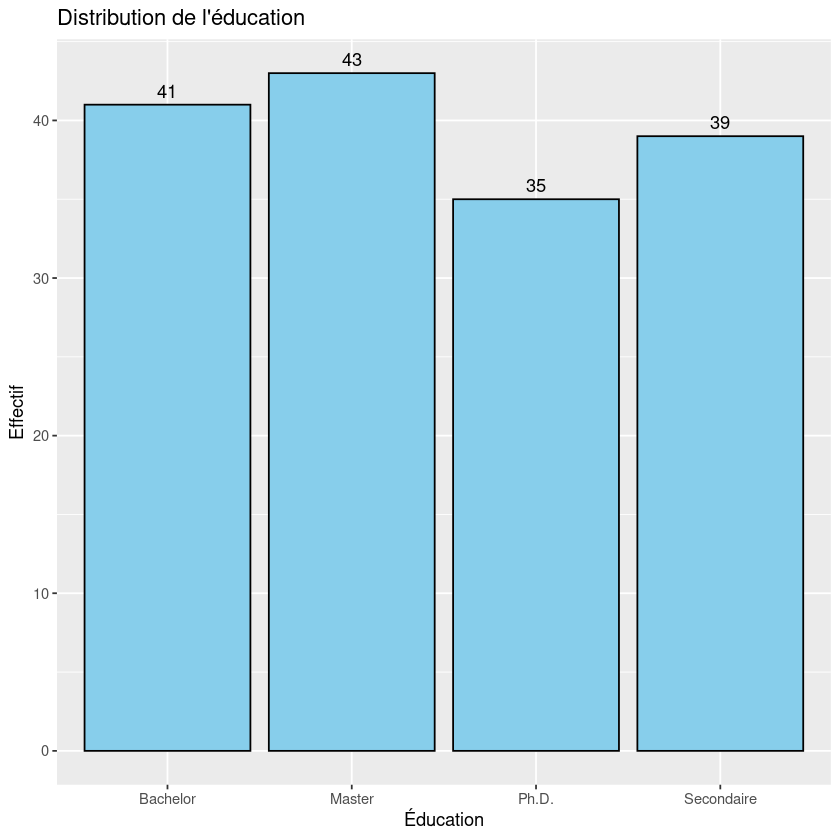

In [119]:
library(ggplot2)

# Créer un bar plot pour la variable 'Education'
ggplot(data, aes(x = Education)) +
  geom_bar(fill = "skyblue", color = "black") +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Distribution de l'éducation",
       x = "Éducation",
       y = "Effectif")


### Étude d'une variable quantitative (Satisfaction)  

 ####  Tendance centrale :

In [120]:
moyenne <- mean(data$Satisfaction)
freq_table <- table(data$Satisfaction)
modes <- as.numeric(names(freq_table[freq_table == max(freq_table)]))
median <- median(data$Satisfaction)
min <- min(data$Satisfaction)
max <- max(data$Satisfaction)

# Affichage des résultats avec print
df <- data.frame(
  Minimum = min,
  Moyenne = moyenne,
  Modes = toString(modes),
  Médiane = median,
  Maximum = max
)
df


Minimum,Moyenne,Modes,Médiane,Maximum
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
5.6,7.855696,8.5,8.2,9.5


Ici on peut voir l’intervalle de variation de la variable Satisfaction, aussi on peut voir que la médiane de 8.2 est proche de la moyenne, suggérant une distribution relativement symétrique. On vérifie ca avec les paramètres de la dispersion.

#### Dispersion :

In [121]:
var <- var(data$Satisfaction)
et <- sd(data$Satisfaction)
df <- data.frame(
  Variance = var,
  Écart_type = et
)
df

Variance,Écart_type
<dbl>,<dbl>
1.190254,1.090988


Les paramètres de la dispersion nous donne des informations sur la distribution des individus et leur dispersion autour de la moyenne, ici on voit que l’écart-type ($\sigma$) n'est pas assez petit que la moyenne ($\bar{X}$), cela peut signifie que nos données ne sont pas très homogènes, et on vérifie ca avec la représentation graphique.

#### Représentation graphique :  
  - Histogramme

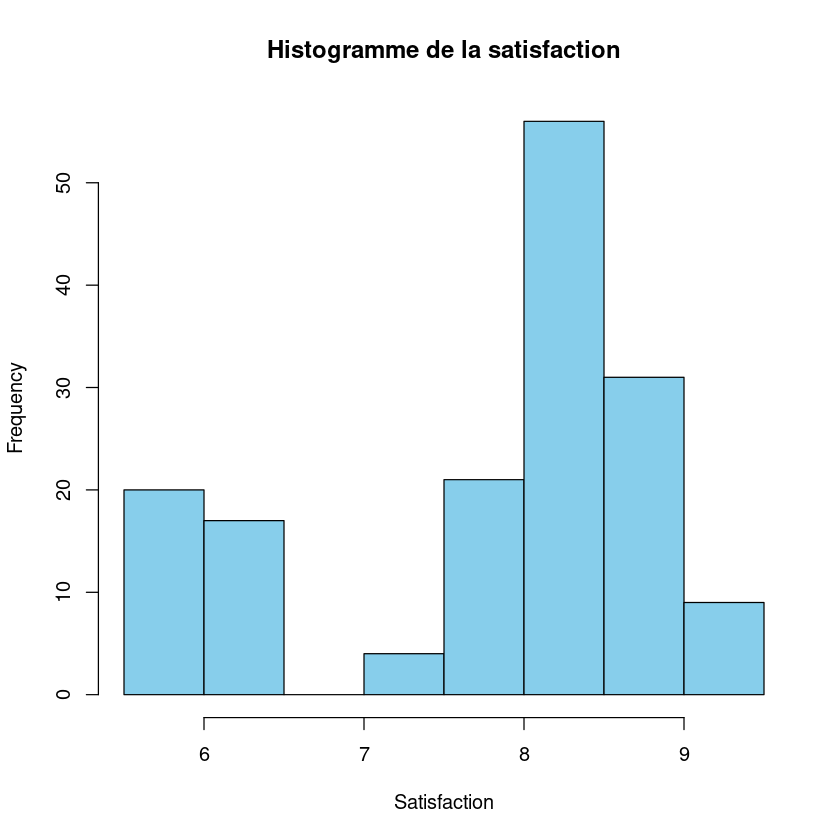

In [122]:
hist(data$Satisfaction,
  breaks = 10, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Histogramme de la satisfaction"
)


Ici on peut clairement voir que la distribution est asymétrique vers le gauche, avec des scores entre 6 et 7 ayant des fréquences plus faibles, et des scores plus que ayant également une fréquence plus faible que 8, mais plus élevée que les valeurs entre 6 et 7.

Une interprétation serait que les participants sont généralement satisfaits, avec une légère majorité étant très satisfaite (score de environs 8), tandis que moins sont extrêmement satisfaits (score autour de 9) ou modérément satisfaits (scores entre 6 et 7).

- Boite a moustache

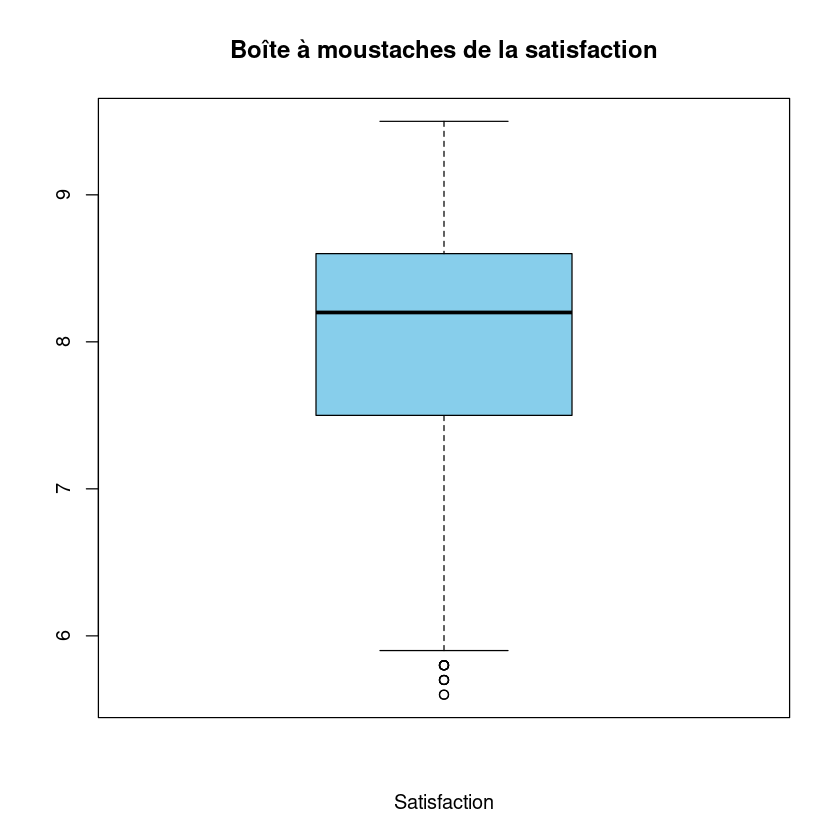

In [123]:
boxplot(data$Satisfaction, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Boîte à moustaches de la satisfaction")

Ce boite a moustache affirme l’asymétrie de notre données, avec la présence des outliers, ils sont les valeurs qui causent l’asymétrie de notre données.

Maintenant qu'on a terminer avec l'analyse univariée, on passe a l'analyse bivairée.

## Analyse bivariée

L'analyse bivariée constitue la prochaine étape logique après l'analyse univariée et se concentre sur les relations entre deux variables à la fois. Elle permet d'explorer les associations, les corrélations et les dépendances entre différentes paires de variables, qu'elles soient quantitatives ou qualitatives.

**Pour les variables quantitatives :**

1. **Régression linéaire simple :** Lorsque l'on souhaite comprendre la relation linéaire entre deux variables quantitatives, la régression linéaire simple est souvent utilisée. Elle permet de modéliser et de prédire la variable dépendante en fonction de la variable indépendante.

2. **Corrélation :** La corrélation (par exemple, le coefficient de corrélation de Pearson) mesure la force et la direction de la relation linéaire entre deux variables quantitatives. Elle indique si les variations dans une variable sont associées aux variations dans une autre variable.

**Pour les variables qualitatives :**

1. **Tableau de contingence :** Lorsque l'on travaille avec deux variables qualitatives, un tableau de contingence est souvent utilisé pour résumer la fréquence des occurrences conjointes des différentes catégories.

2. **Test du chi-carré :** Le test du chi-carré permet de déterminer si deux variables qualitatives sont indépendantes ou s'il existe une association significative entre elles.

3. **Analyse des Correspondances (ACF) :** L'ACF est une méthode puissante pour explorer les relations entre deux variables qualitatives. Elle permet de visualiser et d'interpréter les relations entre les catégories de plusieurs variables qualitatives. L'ACF peut remplacer le tableau de contingence et le test du chi-carré, car ils font partie intégrante de l'ACF.

**Pour les variables mixtes (une quantitative et une qualitative) :**

1. **Analyse de variance (ANOVA) :** Lorsque l'on souhaite comparer les moyennes de la variable quantitative entre différentes catégories de la variable qualitative, l'ANOVA peut être utilisée.

Ces méthodes d'analyse bivariée permettent de découvrir et d'interpréter les relations entre différentes paires de variables, contribuant ainsi à une compréhension plus approfondie des données.

### Étude de deux variables quantitative :

On désormais étudier al relation entre la satisfaction et le revenue des individue, pour cela, on va faire une régression linéaire. Mais tous d'abord, on va voir est ce qu'il y a vraiment une corrélation entre notre variable dépendante (satisfaction) et la variable indépendante (revenue).

  #### Test de Corrélation :

  Pour le test de corrélation de Pearson, le test d’hypothèse est : 
    $$
      \begin{cases} 
        H_0 = \rho = 0 \\
        H_1 = \rho \neq 0 \\
      \end{cases}  
    $$

  Dans ce contexte, $\rho$ représente le coefficient de corrélation, l’hypothèse nulle consiste qu'il n y a pas de corrélation, l'hypothèse alternative dit qu'il ya une corrélation, on rejette l'hypothèse nulle si le $p_{value}$ de test est inférieur a notre seuil $\alpha$, on fix $\alpha$ sur $0.05$. 

In [124]:
# data$Revenu
cor.test(data$Satisfaction, data$Revenu)


	Pearson's product-moment correlation

data:  data$Satisfaction and data$Revenu
t = 13.668, df = 156, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6578989 0.8019156
sample estimates:
      cor 
0.7382072 


Ici on voit que le $p_{value} < 0.05$, donc on rejette l’hypothèse nulle, alors il ya une corrélation entre notre variables, ainsi que on peut voir que le coefficient de corrélation $\rho = 0.73$.
Un coefficient proche de 1 indique qu'il ya une forte corrélation positive.

- Présence de linéarité
  
On peut assurer cette relation linéaire par un graphe.

  

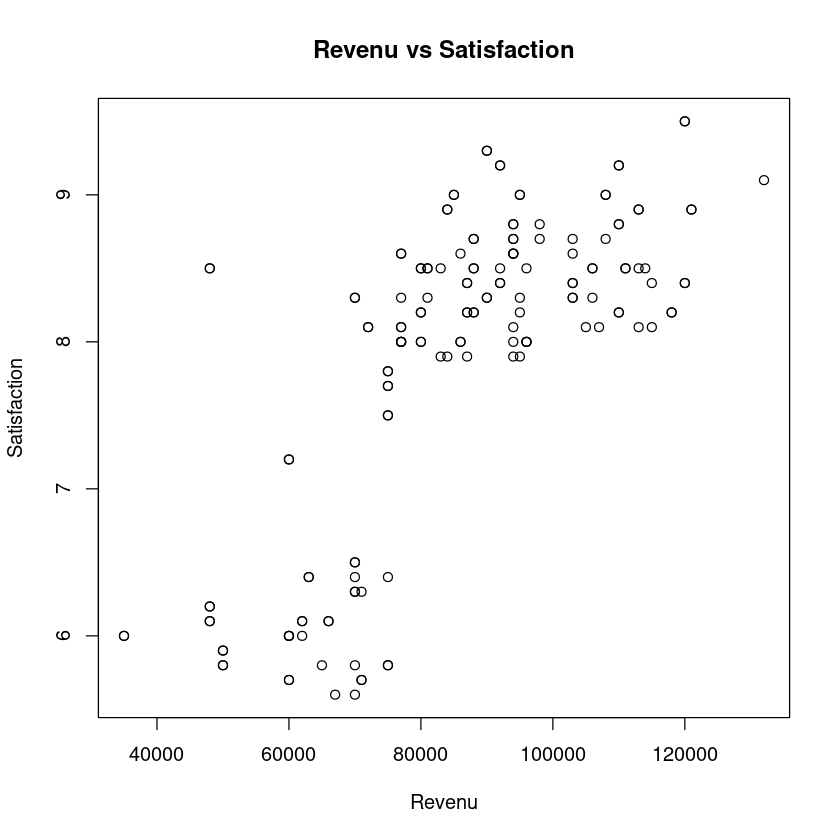

In [125]:
plot(data$Revenu, data$Satisfaction, xlab = "Revenu", ylab = "Satisfaction", main = "Revenu vs Satisfaction")

Ici on peut voir clairement qu'il ya une sorte de linéarité entre les deux variables, et on peut procéder a la régression linéaire.

  #### Régression linéaire



Pour le test de régression linéaire simple, les hypothèses sur les paramètres du modèle sont les suivantes :

$$
\begin{cases}
  \text{Hypothèse sur la Pente (\( \beta_1 \)) :} & \begin{cases}
    H_0: & \beta_1 = 0 \ (\text{Il n'y a pas de relation linéaire significative}) \\
    H_1: & \beta_1 \neq 0 \ (\text{Il y a une relation linéaire significative})
  \end{cases} \\
  \\
  \text{Hypothèse sur l'Intercept (\( \beta_0 \)) :} & \begin{cases}
    H_0: & \beta_0 = 0 \ (\text{L'intercept est nul}) \\
    H_1: & \beta_0 \neq 0 \ (\text{L'intercept est différent de zéro})
  \end{cases}
\end{cases}
$$


Le rejet des hypothèses nulles dépend généralement des p-values associées à chaque coefficient dans la sortie du modèle. Si la p-value associée à $\beta_1$ est inférieure au niveau de signification ($\alpha$) choisi (généralement $0.05$), on peut rejeter l'hypothèse nulle et conclure qu'il y a une relation linéaire significative entre la variable indépendante et la variable dépendante. De manière similaire, si la p-value associée à $\beta_0$ est inférieure à ($\alpha$), on peut rejeter l'hypothèse nulle et conclure que l'intercept est significativement différent de zéro.

La p-value globale du modèle (F-statistic) mesure la significativité globale de l'ensemble du modèle. Une p-value faible (inférieure à $\alpha$) suggère que le modèle dans son ensemble est significatif.

Le coefficient de détermination ($R^2$) mesure la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle. Un $R^2$ élevé (proche de $1$) indique que le modèle explique une grande partie de la variance de la variable dépendante.


In [127]:
modele <- lm(Satisfaction ~ Revenu, data = data)
summary(modele)


Call:
lm(formula = Satisfaction ~ Revenu, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6340 -0.5482  0.1112  0.4850  2.1589 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.398e+00  2.597e-01   16.93   <2e-16 ***
Revenu      4.048e-05  2.962e-06   13.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7383 on 156 degrees of freedom
Multiple R-squared:  0.5449,	Adjusted R-squared:  0.542 
F-statistic: 186.8 on 1 and 156 DF,  p-value: < 2.2e-16


L'interprétation des résultats :

Coefficients :

Intercept (Constante) : L'estimation de l'intercept est $4.398$ avec une erreur standard de $0.2597$. Le t-value associé est $16.93$ avec un p-value très faible $2.2 \times 10^{-16}$, ce qui suggère que l'intercept est significativement différent de zéro. En d'autres termes, la constante dans le modèle est statistiquement significative.

Revenu : L'estimation du coefficient pour la variable "Revenu" est $4.048 \times 10^{-5}$ avec une erreur standard de $2.962 \times 10^{-6}$. Le t-value associé est $13.67$ avec un p-value très faible ($< 2.2 \times 10^{-16}$). Cela suggère que la variable "Revenu" a un effet significatif sur la variable "Satisfaction".

Résidus :

Les résidus (erreurs) du modèle sont présentés sous la section "Residuals". Ils représentent la différence entre les valeurs observées de la variable dépendante ("Satisfaction" dans ce cas) et les valeurs prédites par le modèle.

Statistiques du modèle :

La racine carrée de l'erreur quadratique moyenne $(Residual\ standard\ error)$ est $0.7383$, ce qui donne une indication de la dispersion des résidus autour de la ligne de régression.

Le coefficient de détermination ($R^2$) est $0.5449$, ce qui signifie que $54.49\%$ de la variabilité de la variable "Satisfaction" est expliquée par la variable "Revenu".

La statistique F ($F-statistic$) est utilisée pour tester si au moins une des variables indépendantes a un effet significatif sur la variable dépendante. Ici, la valeur très élevée de $186.8$ avec un p-value très faible ($< 2.2 \times 10^{-16}$) suggère que le modèle global est statistiquement significatif.

En résumé, le modèle de régression linéaire simple suggère que la variable "Revenu" a un effet significatif sur la variable "Satisfaction", et le modèle dans son ensemble est statistiquement significatif. Le $R^2$ indique que le modèle explique une proportion importante de la variabilité de la variable "Satisfaction".

On voit le modèle :

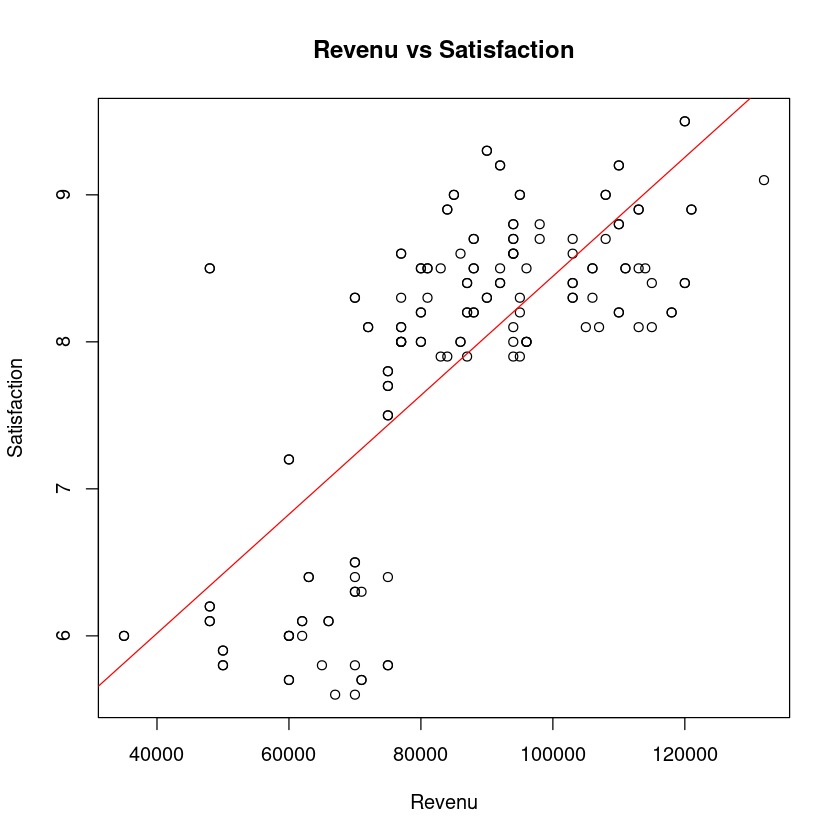

In [130]:
plot(data$Revenu, data$Satisfaction, xlab = "Revenu", ylab = "Satisfaction", main = "Revenu vs Satisfaction")
abline(modele, col = "red")

Ici on voit que la ligne de régression est effectivement passe par la majorité des points.

Pour confirmer que le modèle est significatif, on doit faire des autres tests sur les résidus de notre modèle.

Les tests qu'on doit aborder sont : 

1. **Homoscédasticité :** 

2. **Normalité des résidus :**

3. **Indépendance des résidus :**

Ces tests sont importants pour évaluer la validité des hypothèses sous-jacentes à la régression linéaire et assurer la fiabilité des résultats, pour avoir un modèle qui est bien, tous ou le plus part des tests doivent accepter l'hypothèse nulle.

1. Test d'homoscédasticité (Breusch-Pagan) :

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{La variance des résidus est constante} \\
        H_1 : \text{La variance des résidus n'est pas constante}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si le graphique des résidus montre une tendance ou une forme d'entonnoir.

In [142]:
library(lmtest)
bptest(modele)


	studentized Breusch-Pagan test

data:  modele
BP = 16.079, df = 1, p-value = 6.076e-05



Donc on voit que $p_{value} < 0.05$, cela indique que la variance des résidus n'est pas constante.

2. Test de normalité des résidus (Shapiro-Wilk) :

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{Les résidus suivent une distribution normale} \\
        H_1 : \text{Les résidus ne suivent pas une distribution normale}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si l'histogramme des résidus ou le test de normalité (comme le test de Shapiro-Wilk) indique une non-normalité.


In [144]:
shapiro.test(resid(modele))


	Shapiro-Wilk normality test

data:  resid(modele)
W = 0.98353, p-value = 0.05712


Une $p_{value} > 0.05$ indique qu'on accepte l’hypothèse nulle, et que les résidus suivent une distribution normale.

3. Test d'indépendance des résidus (Durbin-Watson) :

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{Les résidus sont indépendants} \\
        H_1 : \text{Les résidus ne sont pas indépendants}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si les résidus montrent des schémas ou des corrélations évidents.


In [145]:
dwtest(modele)


	Durbin-Watson test

data:  modele
DW = 2.1576, p-value = 0.836
alternative hypothesis: true autocorrelation is greater than 0


Ici on a $ p_{value} > 0.05$, donc on accepte l’hypothèse nulle, et on dit que les résidus sont indépendants.

#### Conclusion

Le modèle de régression linéaire simple indique une relation significative entre la variable dépendante et la variable indépendante. Cependant, des préoccupations subsistent en raison des violations de l'hypothèses d'homoscédasticité des résidus. Des ajustements ou des analyses plus approfondies sont recommandés pour renforcer la validité du modèle.

### Étude de deux variables qualitatives :

La question que se pose dans cette analyse est, est ce qu'il y a une correspondance entre notre deux variables qualitatives, le niveau d’étude et le poste de travail, pour cela on va effectuer une AFC.

#### Analyse factorielle de correspondance (AFC)

L'Analyse Factorielle des Correspondances (AFC) est une technique d'analyse statistique particulièrement adaptée pour explorer les relations entre deux variables nominales. Elle trouve son application dans des domaines tels que la sociologie, la psychologie, la biologie, et d'autres disciplines où l'on cherche à comprendre les associations entre des catégories de variables.

Voici les principales étapes de l'Analyse Factorielle des Correspondances :

1. **Construction du Tableau de Contingence :** La première étape consiste à créer un tableau de contingence qui résume la fréquence des co-occurrences entre les différentes modalités des deux variables étudiées. Ce tableau met en évidence les associations entre les catégories et constitue la base de l'analyse.

2. **Test du Khi-deux :** Une fois le tableau de contingence établi, on utilise le test du Khi-deux pour évaluer l'indépendance entre les variables. L'hypothèse nulle du test stipule que les variables sont indépendantes, tandis que l'hypothèse alternative suggère une association significative. Un faible résultat de p-value conduirait au rejet de l'hypothèse d'indépendance.

3. **Calcul des Coordonnées Factorielles :** Si le test du Khi-deux indique une dépendance significative, l'analyse se poursuit en calculant les coordonnées factorielles. Ces coordonnées représentent la projection des modalités des variables sur un espace factoriel de dimensions réduites.

4. **Interprétation des Résultats :** L'interprétation des coordonnées factorielles permet de visualiser les associations entre les catégories des variables. Les modalités proches dans l'espace factoriel sont celles qui présentent des similitudes dans leurs distributions conjointes.

L'Analyse Factorielle des Correspondances offre ainsi une approche graphique et statistique pour explorer les relations entre variables catégorielles. Elle permet de mettre en évidence des patterns, des regroupements, ou des dépendances, offrant ainsi un éclairage précieux sur la structure des données.

#### Tableau de contingence

In [161]:
# Construction du tableau de contingence
tc <- table(data$Education, data$Secteur)
colnames(tc) <- c("OouvrA", "Secr", "PDG", "IngA", "EmplA")
# Affichage du tableau de contingence
tc


            
             OouvrA Secr PDG IngA EmplA
  Bachelor        2    8   0    0    31
  Master         15   15   0   11     2
  Ph.D.           9    4   0   22     0
  Secondaire      0    0  39    0     0

### Table de profile ligne :

In [171]:
tpl <- prop.table(tc, 1)
# tpl$total <- c(1:4)
tpl
tpl

            
                 OouvrA       Secr        PDG       IngA      EmplA
  Bachelor   0.04878049 0.19512195 0.00000000 0.00000000 0.75609756
  Master     0.34883721 0.34883721 0.00000000 0.25581395 0.04651163
  Ph.D.      0.25714286 0.11428571 0.00000000 0.62857143 0.00000000
  Secondaire 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000

On lire ce tableau de la manière suivante :
$19.5\%$ des gens qui ont un degré bachelor sont des secrétaires.